<a href="https://colab.research.google.com/github/Zahab163/StoryTelling_HousingAnaysis/blob/main/Zahab_HousingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1: Setup & Load Data



In [1]:
#Importing Libraries which are needed in the Process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Uploaded the housing prices file which needs data cleaning

df = pd.read_csv('/content/Housing.csv')

##Part 2: Explore & Clean Data

In [3]:
#display data frame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#describing the data frame
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#diplay the information to check the displacement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#changing  yes , no to bolean True , False

yes_no = {"yes": True, "no": False , True: True , False: False} # True and False keys ensure correct values aren't overwritten if cell is run more than once

#colums in which we want changes
for col in [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]:
    df[col] = df[col].map(yes_no, na_action='ignore')

In [7]:
#display to check the Changings
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished


## Part 3: Compute Statistics

 Use Numerical Columns like :

1.   Prices
2.   Area
3.   Bedrooms



In [8]:
#Displaying the Columns on which we have to work further Price , Area ,bedrooms
df.iloc[:,0:3].head()


,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [9]:
#Discribing together Count , mean ,std ,min ,max and so on of prices and Areas
df.iloc[:,0:3].describe()

,price,area,bedrooms
count,5.450000e+02,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138
std,1.870440e+06,2170.141023,0.738064
min,1.750000e+06,1650.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000
50%,4.340000e+06,4600.000000,3.000000
75%,5.740000e+06,6360.000000,3.000000
max,1.330000e+07,16200.000000,6.000000


In [10]:
#display max of price
df['price'].max()

13300000

In [11]:
#display Average of price
df['price'].mean()


np.float64(4766729.247706422)

In [12]:
#display median of price
df["price"].median()

4340000.0

In [13]:
#display the minimum of the price
df['price'].min()

1750000

In [14]:
#display the mode of the price
df["price"].mode()



,price
0,3500000
1,4200000


In [15]:
#display the variance of price
df['price'].var()


3498544355820.5796

In [16]:
#Display the  Standard deviation of price

df['price'].std()



1870439.615657394

In [17]:
#Display the skewness of price
df['price'].skew()



np.float64(1.2122388370279802)

In [18]:
df['price'].kurt()

np.float64(1.9601302314151994)

In [19]:
df['area'].mean()


np.float64(5150.54128440367)

In [20]:
df['area'].median()


4600.0

In [21]:
df['area'].mode()


,area
0,6000


In [22]:
df['area'].var()


4709512.057575553

In [23]:
df['area'].std()


2170.141022508803

In [24]:
df['area'].skew()


np.float64(1.321188343153483)

In [25]:
df['area'].kurt()


np.float64(2.7514801872608086)

In [26]:
df['area'].min()


1650

In [27]:
df['area'].max()

16200

##Part:04 Visualization: Box Plots for Price and Area
Box plots are ideal for showing:
- Median
- Quartiles (25%, 75%)
- Min/Max
- Outliers


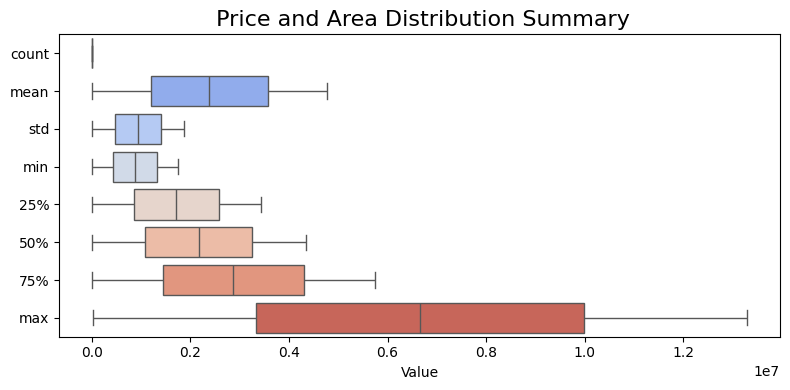

In [28]:
# Summary statistics
summary_data = {
    'price': {
        'count': 545, 'mean': 4766729, 'std': 1870440, 'min': 1750000,
        '25%': 3430000, '50%': 4340000, '75%': 5740000, 'max': 13300000
    },
    'area': {
        'count': 545, 'mean': 5150.54, 'std': 2170.14, 'min': 1650,
        '25%': 3600, '50%': 4600, '75%': 6360, 'max': 16200
    }
}

# Convert to DataFrame for plotting
summary_df = pd.DataFrame(summary_data)

# Create box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=summary_df.T, orient='h', palette='coolwarm')
plt.title(' Price and Area Distribution Summary', fontsize=16)
plt.xlabel('Value')
plt.tight_layout()
plt.show()

#What You’ll See
- Price: Wide range with a high max (13.3M), indicating possible luxury listings
- Area: Also a broad spread, with some very large properties (up to 16,200 sq ft)
- Outliers: Easily spotted in both categories

## Histogram for Price and Area Distribution





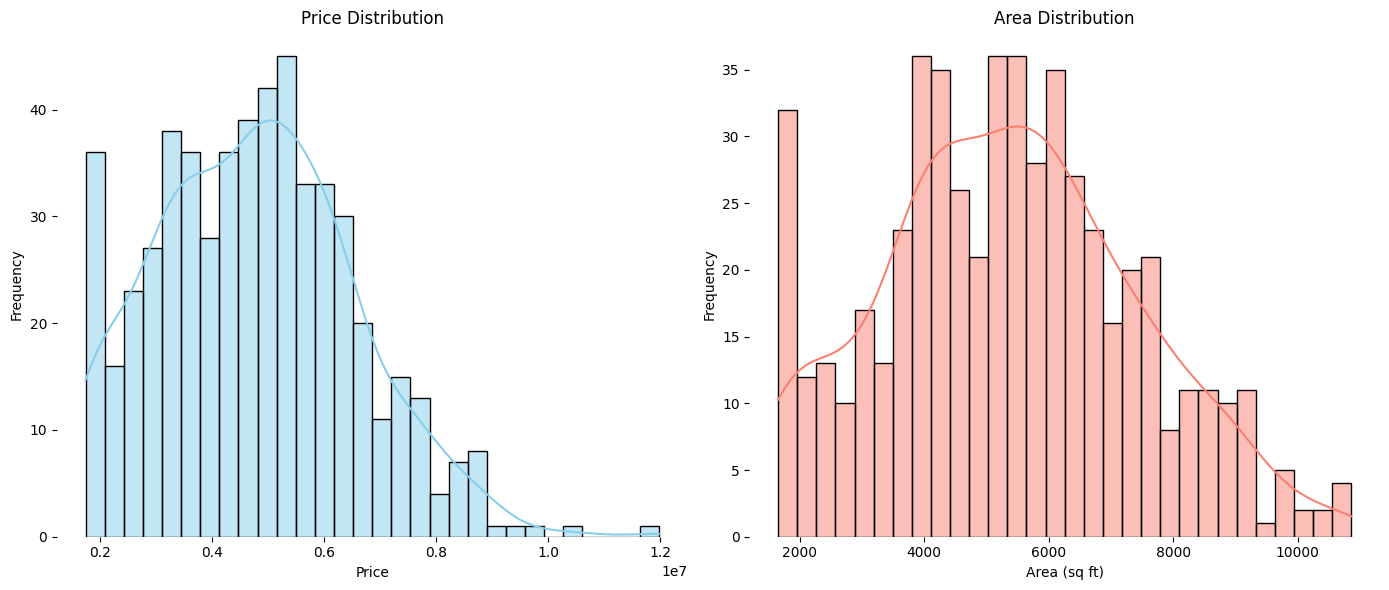

In [29]:
# Simulated data based on summary stats
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data using normal distribution (approximation)
price_data = np.random.normal(loc=4766729, scale=1870440, size=545)
area_data = np.random.normal(loc=5150.54, scale=2170.14, size=545)

# Clip values to match min/max from your stats
price_data = np.clip(price_data, 1750000, 13300000)
area_data = np.clip(area_data, 1650, 16200)

# Create DataFrame
df_simulated = pd.DataFrame({
    'Price': price_data,
    'Area': area_data
})

# Plot histograms
plt.figure(figsize=(14, 6))

# Price Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_simulated['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Remove Borders
ax1 = plt.gca()
for spine in ['top', 'right', 'bottom', 'left']:
    ax1.spines[spine].set_visible(False)


# Area Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_simulated['Area'], bins=30, kde=True, color='salmon')
plt.title('Area Distribution')
plt.xlabel('Area (sq ft)')
plt.ylabel('Frequency')

#Remove Borders
ax2 = plt.gca()
for spine in ['top', 'right', 'bottom', 'left']:
    ax2.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

- Price: Whether most listings cluster around the mean or skew toward luxury
- Area: How common smaller vs. larger properties are
- KDE Curve: Smooth line showing the distribution shape


Here’s a clean and effective way to visualize your data using Seaborn and Matplotlib:

##Scatter Plot: Price vs Area (Color-coded by Bedrooms)


/tmp/ipython-input-1179773865.py:21: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


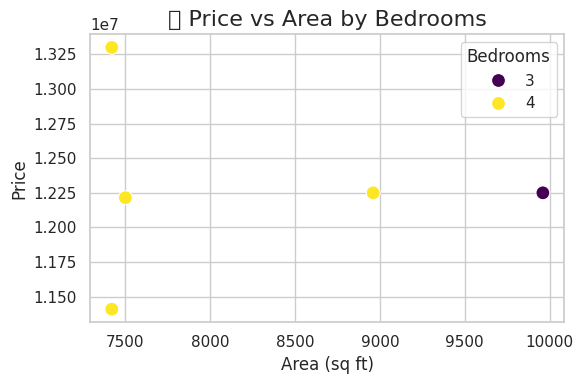

In [30]:
# Sample data
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4]
}
df = pd.DataFrame(data)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(data=df, x='area', y='price', hue='bedrooms', palette='viridis', s=100)

# Add labels and title
plt.title('🏠 Price vs Area by Bedrooms', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Bedrooms')
plt.tight_layout()

plt.show()

What This Shows

- Clusters of similar properties by bedroom count
- Whether price increases linearly with area
- If 3-bedroom homes are priced differently than 4-bedroom ones


Bar Chart: Average Price per Bedroom Count




/tmp/ipython-input-2940467863.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='bedrooms', y='price', palette='mako')
/tmp/ipython-input-2940467863.py:22: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


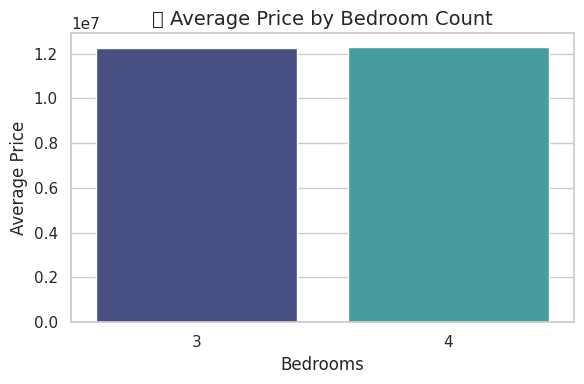

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4]
}
df = pd.DataFrame(data)

# Calculate average price by bedroom count
avg_price = df.groupby('bedrooms')['price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_price, x='bedrooms', y='price', palette='mako')
plt.title('💰 Average Price by Bedroom Count', fontsize=14)
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.tight_layout()

plt.show()


These visualizations will help you uncover patterns in property size and pricing.

## Part 5: Storytelling


##Housing Market Insights: Price and Area Distribution Analysis


#Housing Price Overview
The housing market data presents a broad spectrum of property prices, with values ranging from $1.75 million to $13.3 million. The average price is approximately $4.77 million, while the median stands slightly lower at $4.34 million. This difference suggests that a few high-priced properties are pulling the average upward. The standard deviation of around $1.87 million confirms that prices vary widely across listings.

# Price Distribution and Outliers
Further analysis shows that the price distribution is positively skewed, meaning most homes are priced below the average, but a small number of luxury properties raise the overall range. The kurtosis value of 1.96 indicates the presence of outliers—properties that are significantly more expensive than the rest. These outliers are likely high-end homes with premium features or locations.

# Property Area Analysis
The area of the properties also shows considerable variation. The average size is about 5,150 square feet, with some homes as small as 1,650 sq ft and others as large as 16,200 sq ft. Like price, the area distribution is positively skewed, suggesting that most homes are moderately sized, with a few exceptionally large ones.

# Market Diversity and Insights
Overall, the data reflects a diverse housing market with both affordable and luxury options. There is no single price or size category that dominates, making it important for buyers and sellers to understand the spread. These insights can help individuals make informed decisions based on their budget, preferences, and investment goals.


**Written by:**
**Zahabia Ahmed**



